# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

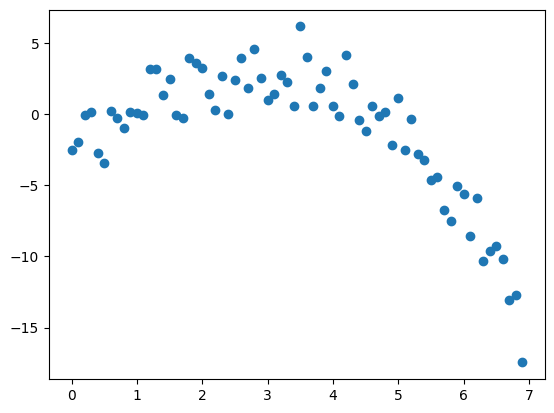

In [5]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
xs = xy_data[:, 0]
ys = xy_data[:, 1]
plt.scatter(xs, ys)
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [10]:
def polyreg(data_matrix, k):
    N, _ = data_matrix.shape
    xs = data_matrix[:, 0]
    ys = data_matrix[:, 1]
    # Create the generalized matrix X.
    Xn = np.zeros((N, k+1))  # Define the size of Xn in advance for memory reasons.
    for i in range(k+1):
        Xn[:, i] = xs ** i 
    
    beta_vector = np.linalg.lstsq(Xn, ys, rcond=None)[0]

    fitted_ys_vector = Xn.dot(beta_vector)
    residuals_vector = ys - fitted_ys_vector
    return beta_vector, fitted_ys_vector, residuals_vector
    

Use the tests below to check the outputs of the function you have written:

In [17]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

[ 2. -7.  3.]
[3.1]
[3.1]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

sse_2=172.181025, r_squared=0.887630
sse_3=152.405805, r_squared=0.900536
sse_4=151.227790, r_squared=0.901304


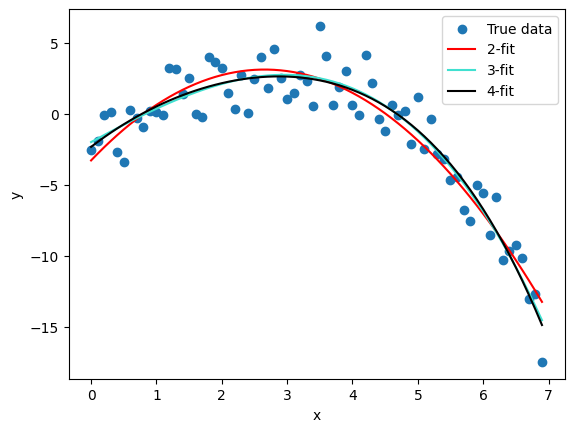

In [25]:
ys_2_reg = polyreg(xy_data, 2)
ys_3_reg = polyreg(xy_data, 3)
ys_4_reg = polyreg(xy_data, 4)

sse_0 = sum(polyreg(xy_data, 0)[2] ** 2)  # for comparison
sse_2 = sum(ys_2_reg[2] ** 2) # sum of square residuals
r_squared2 = 1 - sse_2/sse_0
sse_3 = sum(ys_3_reg[2] ** 2)
r_squared3 = 1 - sse_3/sse_0
sse_4 = sum(ys_4_reg[2] ** 2)
r_squared4 = 1 - sse_4/sse_0

print(f"sse_2={sse_2:2f}, r_squared={r_squared2:2f}")
print(f"sse_3={sse_3:2f}, r_squared={r_squared3:2f}")
print(f"sse_4={sse_4:2f}, r_squared={r_squared4:2f}")

plt.scatter(xs, ys, label="True data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys_2_reg[1], color="red", label="2-fit")
plt.plot(xs, ys_3_reg[1], color="turquoise", label="3-fit")
plt.plot(xs, ys_4_reg[1], color="black", label="4-fit")
plt.legend()
plt.show()

 #### State which model you choose and briefly justify your choice.
 
There is hardly any difference in the R2 value for the different fits, so it makes sense to stick to a quadratic fit and avoid the perils of overfitting, and any uncessary complexity.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

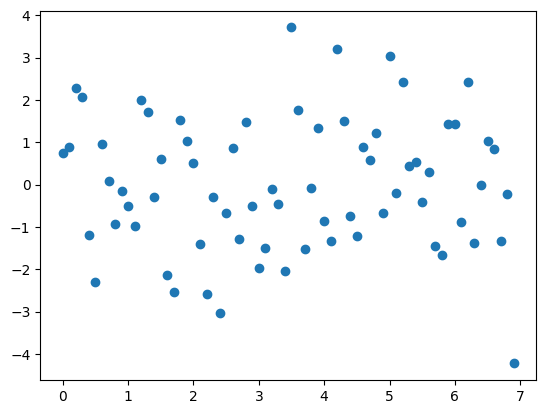

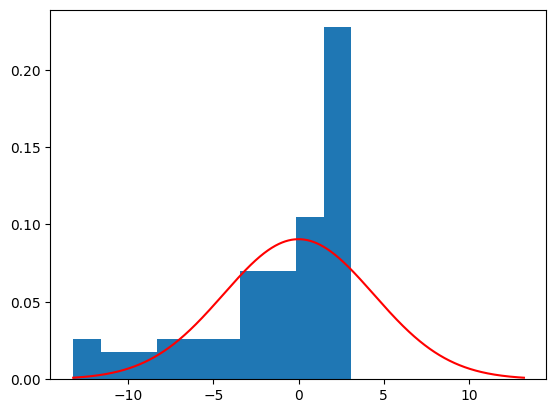

In [30]:
#Your code here
from scipy.stats import norm
plt.scatter(xs, ys_2_reg[2])
plt.show()  # They look random enough, there isn't some sort of easily correctable systematic error.

stdev_2 = np.std(ys_2_reg[1])
plt.hist(ys_2_reg[1], density=True)
xvals = np.linspace(-3*stdev_2,3*stdev_2,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=stdev_2), 'r')
plt.show()  # The errors do seem to be left-squewed by a fair margin. Maybe 3 would be better then?
